<a href="https://colab.research.google.com/github/KotaHemanthUC/AI_ML/blob/main/bertopic_seeded_unseeed_lastday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Question 3 Topic Modeling**

## Preprocessing

In [ ]:
import re
import pickle
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')

def remove_stopwords(text, stop_words):

    word_tokens = word_tokenize(text)
    # Remove stopwords based on the custom list
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

def preprocess_data(df, stop_words):
    # Define unwanted patterns
    unwanted_patterns = {
        'unwanted_texts': ['eNewspaper','Sign up','email','newsletters', 'Trending', 'Chicago Tribune', 'Copyright', 'Getty Images'],
        'slash_pattern': re.compile(r'(\w+\s+)?(\w+\s+)?(\w+\s+)?/{1,2}\s*(\w+\s+)?(\w+\s+)?(\w+)?'),
        'months': re.compile(r'\b(Jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|Nov(?:ember)?|Dec(?:ember)?)\b', re.IGNORECASE),
        "twitter_pattern": re.compile(r'Twitter[:\s]*@\w+|\b@\w+', re.IGNORECASE),
        "url_combined_pattern": re.compile(r'\b(?:https?:\/\/)?(?:www\.)?\S+\.(org|com)\b|[^\.\!?]*\.com[^\.\!?]*[\.\!?]', re.IGNORECASE),
        'phone_fax_pattern': re.compile(r'\b\d{3}[-.\s]??\d{3}[-.\s]??\d{4}\b'),
        'date_pattern': re.compile(r'\b\d{1,2}[-/\s]\d{1,2}[-/\s]\d{2,4}\b'),
        'pattern_dashes': "_{2,}"
    }

    for index, row in df.iterrows():
        text = row['combined_text']
        # Remove specific unwanted texts and patterns
        for pattern_key in unwanted_patterns:
            if pattern_key == 'unwanted_texts':
                for unwanted_text in unwanted_patterns[pattern_key]:
                    text = re.sub(r'(?i)' + re.escape(unwanted_text), '', text)  # Case-insensitive removal
            else:
                text = re.sub(unwanted_patterns[pattern_key], '', text)

        text = remove_stopwords(text, stop_words)

        symbol_number_pattern = re.compile(r'[^\w\s]+|\b\d+\b')
        text = re.sub(symbol_number_pattern, '', text)


        df.at[index, 'combined_text'] = text.strip()

    return df


with open('/content/drive/MyDrive/bertopic_data/stopwords.txt', 'r') as file:
    stopwords_text = file.read()
    custom_stops = [word.strip('"') for word in stopwords_text.strip().split(', ')]



df_clean = preprocess_data(df_raw, custom_stops)


output_file = '/content/drive/MyDrive/bertopic_data/ct_preprocessed_texts_last_day_1999_2023.csv'
df_clean.to_csv(output_file, index=False)


In [ ]:
!pip install bertopic

In [ ]:
!pip install nltk

In [ ]:
import pickle
import numpy as np
import pandas as pd
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:

df = pd.read_csv('/content/drive/MyDrive/bertopic_data/ct_preprocessed_texts_last_day_1999_2023.csv')
df = df.copy()
df= df.dropna()
df.reset_index(drop=True, inplace=True)

In [ ]:
df.head()

,URL,Publish Date,combined_text
0,https://www.chicagotribune.com/2002/01/31/abou...,2002-01-30 19:00:00,discovered missing Tuesday discovered missing ...
1,https://www.chicagotribune.com/2017/03/31/grea...,2017-03-31 09:35:00,Great moments Chicago food history Jean Baptis...
2,https://www.chicagotribune.com/2000/05/31/two-...,2000-05-30 20:00:00,young Aurora men escaped injury Monday young A...
3,https://www.chicagotribune.com/2006/02/28/atki...,2006-02-27 19:00:00,ATKINS BETH ANN Beth Ann Atkins nee Kanfer age...
4,https://www.chicagotribune.com/1999/06/30/koop...,1999-06-29 20:00:00,KOOP COUP SPINS WEB CULT PERSONALITY Everett K...


In [ ]:

embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

embeddings = embedding_model.encode(df['combined_text'], show_progress_bar=True)

np.save('/content/drive/MyDrive/bertopic_data/embeddings_news.npy', embeddings)


Batches:   0%|          | 0/2519 [00:00<?, ?it/s]

In [ ]:

embeddings = np.load('/content/drive/MyDrive/bertopic_data/embeddings_news.npy')
vectorizer_model= CountVectorizer(min_df= 5, ngram_range=(1, 3))

In [ ]:
from umap import UMAP

umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)

from hdbscan import HDBSCAN

hdbscan_model = HDBSCAN(min_cluster_size=100, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

# Seeded_model_1


    ["whatsapp", "facebook", "instagram", "twitter", "bumble", "tinder", "influencers", "social media", "chatting", "tiktok", "snapchat", "selfie", "reels"],
    ["mobile", "wearables", "drones", "wireless", "bluetooth", "wifi", "ipad", "iPhone", "touch screen", "ipod", "electric vehicle", "Tesla"],
    ["artificial intelligence", "machine learning", "robotics", "chatgpt", "openai", "cybersecurity", "hacking", "encryption", "crypto", "bitcoin"],
    ["netflix", "animation", "graphics", "Podcasts", "nft", "dslr", "4K", "virtual reality", "playstation", "streaming"],
    ["Fantasy Sports", "olympics", "world cup", "yoga", "betting", "nfl", "super bowl", "MLB", "Fifa", "f1", "NHL"]

In [ ]:
from bertopic import BERTopic
import pandas as pd
nltk.download('wordnet')

seed_topic_list = [
    ["whatsapp", "facebook", "instagram", "twitter", "bumble", "tinder", "influencers", "social media", "chatting", "tiktok", "snapchat", "selfie", "reels"],
    ["mobile", "wearables", "drones", "wireless", "bluetooth", "wifi", "ipad", "iPhone", "touch screen", "ipod", "electric vehicle", "Tesla"],
    ["artificial intelligence", "machine learning", "robotics", "chatgpt", "openai", "cybersecurity", "hacking", "encryption", "crypto", "bitcoin"],
    ["netflix", "animation", "graphics", "Podcasts", "nft", "dslr", "4K", "virtual reality", "playstation", "streaming"],
    ["Fantasy Sports", "olympics", "world cup", "yoga", "betting", "nfl", "super bowl", "MLB", "Fifa", "f1", "NHL"]
]


topic_model = BERTopic(

  language="english", calculate_probabilities=True, verbose = True,
  vectorizer_model=vectorizer_model,hdbscan_model = hdbscan_model, nr_topics= 'auto',
  seed_topic_list=seed_topic_list,umap_model=umap_model, top_n_words = 10, min_topic_size = 10
)
topics, probs = topic_model.fit_transform(df['combined_text'],embeddings)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
2024-03-20 10:23:44,775 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-20 10:25:21,279 - BERTopic - Dimensionality - Completed ✓
2024-03-20 10:25:21,283 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-20 10:25:55,607 - BERTopic - Cluster - Completed ✓
2024-03-20 10:25:55,609 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-20 10:28:18,516 - BERTopic - Representation - Completed ✓
2024-03-20 10:28:18,537 - BERTopic - Topic reduction - Reducing number of topics
2024-03-20 10:30:44,213 - BERTopic - Topic reduction - Reduced number of topics from 76 to 40


In [ ]:
embedding_model = "sentence-transformers/all-MiniLM-L6-v2"
topic_model.save("/content/drive/MyDrive/bertopic/bertopic_model_lastday", serialization="safetensors", save_ctfidf=True, save_embedding_model=embedding_model)

In [ ]:
# loaded_model = BERTopic.load("/content/drive/MyDrive/bertopic/bertopic_model_lastday", embedding_model=embedding_model)

In [ ]:
freq = topic_model.get_topic_info();
freq

,Topic,Count,Name,Representation,Representative_Docs
0,-1,24014,-1_police_people_chicago_year,"[police, people, chicago, year, years, city, t...",[year Chicago homicides late 1990s Amid spik...
1,0,14714,0_game_field_season_team,"[game, field, season, team, games, points, bea...",[Robert Quinn trade play Chicago Bears defens...
2,1,13125,1_school_district_chicago_year,"[school, district, chicago, year, percent, sta...",[PLAINFIELD SCHOOLS FAST TRACK Officials Plai...
3,2,10490,2_funeral_late_am_loving,"[funeral, late, am, loving, beloved, visitatio...",[KEATING DOROTHY R Dorothy R Keating nee Ku...
4,3,4461,3_music_film_movie_theatre,"[music, film, movie, theatre, band, pm, chicag...",[MUSICAL SINGS TABLOID TENDENCIES man stuck Ke...
5,4,2077,4_trump_president_obama_clinton,"[trump, president, obama, clinton, house, camp...",[Trump resists mounting pressure Bannon fight...
6,5,1096,5_iraq_iraqi_war_military,"[iraq, iraqi, war, military, forces, syria, us...",[Hussein kin arrest blow insurgency prove ma...
7,6,958,6_dear_amy_children_parents,"[dear, amy, children, parents, dear amy, famil...",[Teen girl ready baby guy Dear Amy boy ...
8,7,943,7_minute_game_half_ball,"[minute, game, half, ball, goal, team, gk, coa...",[APPEARS TARGET PRACTICE season prepared Tues...
9,8,899,8_hurricane_storm_weather_wgntv,"[hurricane, storm, weather, wgntv, winds, coas...",[wobble luck preparations lessened Laura dev...


In [ ]:


# If you need to load the model later, you can use the following:
# topic_model = BERTopic.load("/content/drive/MyDrive/bertopic/bertopic_model")



# Unseeded

In [ ]:
from bertopic import BERTopic
import pandas as pd
nltk.download('wordnet')

topic_model_unseeded = BERTopic(

  language="english", calculate_probabilities=True, verbose = True,
  vectorizer_model=vectorizer_model,hdbscan_model = hdbscan_model, nr_topics= 'auto',
  umap_model=umap_model, top_n_words = 10, min_topic_size = 10
)
topics, probs = topic_model_unseeded.fit_transform(df['combined_text'],embeddings)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
2024-03-20 13:31:49,595 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-20 13:33:44,745 - BERTopic - Dimensionality - Completed ✓
2024-03-20 13:33:44,748 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-20 13:34:17,534 - BERTopic - Cluster - Completed ✓
2024-03-20 13:34:17,536 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-20 13:36:48,876 - BERTopic - Representation - Completed ✓
2024-03-20 13:36:48,899 - BERTopic - Topic reduction - Reducing number of topics
2024-03-20 13:39:20,935 - BERTopic - Topic reduction - Reduced number of topics from 76 to 40


In [ ]:
embedding_model = "sentence-transformers/all-MiniLM-L6-v2"
topic_model_unseeded.save("/content/drive/MyDrive/bertopic/bertopic_model_lastday_unseeded", serialization="safetensors", save_ctfidf=True, save_embedding_model=embedding_model)

In [ ]:
topic_model_unseeded.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,24014,-1_police_people_chicago_year,"[people, chicago, police, year, years, time, c...",[year Chicago homicides late 1990s Amid spik...
1,0,19424,0_game_field_season_team,"[game, field, season, team, games, points, bea...",[Robert Quinn trade play Chicago Bears defens...
2,1,18604,1_school_district_chicago_year,"[year, school, chicago, percent, people, time,...",[PLAINFIELD SCHOOLS FAST TRACK Officials Plai...
3,2,12023,2_funeral_late_am_loving,"[funeral, late, am, loving, beloved, visitatio...",[KEATING DOROTHY R Dorothy R Keating nee Ku...
4,3,4931,3_music_film_movie_theatre,"[read, review, album, music, band, film, chica...",[MUSICAL SINGS TABLOID TENDENCIES man stuck Ke...
5,4,1363,4_trump_president_obama_clinton,"[dear, church, children, people, family, time,...",[Trump resists mounting pressure Bannon fight...
6,5,236,5_iraq_iraqi_war_military,"[rugby, tribune regrets, australia, zealand, e...",[Hussein kin arrest blow insurgency prove ma...


In [ ]:

df['Topic_Number'] = topics


topic_labels = {topic_num: "_".join([word for word, _ in words]) for topic_num, words in topic_model_unseeded.get_topics().items()}


representation_words = {}
for topic_num in set(topics):
    words = topic_model_unseeded.get_topic(topic_num)
    if words:
        representation_words[topic_num] = ", ".join([word for word, _ in words])


df['Topic_Label'] = df['Topic_Number'].map(topic_labels)
df['Representation_Words'] = df['Topic_Number'].apply(lambda x: representation_words.get(x, "N/A"))


output_csv_path = '/content/drive/MyDrive/bertopic/before_dataframe_with_topics.csv'
df.to_csv(output_csv_path, index=False)



In [ ]:

topic_info_df = topic_model_unseeded.get_topic_info()

topic_info_df.to_csv('/content/drive/MyDrive/bertopic/topic_info_unseeded.csv', index=False)


In [ ]:
sum_of_column = topic_info_df['Count'].sum()
sum_of_column

80595

In [ ]:
topic_model_unseeded.visualize_topics()

# After Merging Similar Topics Manually to reduce the Number of topics


In [ ]:
import pandas as pd
import ast


df_topics = pd.read_csv('/content/drive/MyDrive/bertopic/topic_info_unseeded.csv')

# Define your lists of topics
topic_lists = [
    [0, 7, 16, 33, 35],
    [3, 22, 23],
    [4, 24, 1, 31],
    [5, 20, 21, 25, 28, 29, 34],
    [8, 19, 27],
    [10, 9],
    [11, 17, 18, 2, 30],
    [12, 13, 38],
    [14, 26],
    [6, 15],
    [37, 36],
    [-1, 32]
]

topic_to_list_and_new_number = {}
for new_number, topics in enumerate(topic_lists, start=1):
    for topic in topics:
        topic_to_list_and_new_number[topic] = (topics, new_number)

# Apply the mapping to create new columns
df_topics['topic_list'], df_topics['topic_new'] = zip(*df_topics['Topic'].apply(lambda topic: topic_to_list_and_new_number.get(topic, ([], 0))))

# Convert 'topic_list' to a string representation
df_topics['topic_list'] = df_topics['topic_list'].apply(lambda x: str(x))

# df_topics[['Topic','Name','Representation', 'Representative_Docs', 'topic_list', 'topic_new']].head(12)


df_topics['Representation'] = df_topics['Representation'].apply(ast.literal_eval)


def combine_lists(lists):
    combined_list = []
    for lst in lists:
        combined_list.extend(item for item in lst if item not in combined_list)
    return combined_list


representation_combo = df_topics.groupby('topic_new')['Representation'].agg(combine_lists).reset_index()


representation_combo.rename(columns={'Representation': 'representation_combo'}, inplace=True)

df_topics = pd.merge(df_topics, representation_combo, on='topic_new', how='left')

df_topics[['Topic', 'Name', 'Count','Representation', 'Representative_Docs', 'topic_list', 'topic_new', 'representation_combo']].head(20)



,Topic,Name,Count,Representation,Representative_Docs,topic_list,topic_new,representation_combo
0,-1,-1_police_people_chicago_year,24014,"[police, people, chicago, year, years, city, t...",['year Chicago homicides late 1990s Amid spi...,"[-1, 32]",12,"[police, people, chicago, year, years, city, t..."
1,0,0_game_field_season_team,14714,"[game, field, season, team, games, points, bea...",['Robert Quinn trade play Chicago Bears defen...,"[0, 7, 16, 33, 35]",1,"[game, field, season, team, games, points, bea..."
2,1,1_school_district_chicago_year,13125,"[school, district, chicago, year, percent, sta...",['PLAINFIELD SCHOOLS FAST TRACK Officials Pla...,"[4, 24, 1, 31]",3,"[school, district, chicago, year, percent, sta..."
3,2,2_funeral_late_am_loving,10490,"[funeral, late, am, loving, beloved, visitatio...",['KEATING DOROTHY R Dorothy R Keating nee K...,"[11, 17, 18, 2, 30]",7,"[funeral, late, am, loving, beloved, visitatio..."
4,3,3_music_film_movie_theatre,4461,"[music, film, movie, theatre, band, pm, chicag...",['MUSICAL SINGS TABLOID TENDENCIES man stuck K...,"[3, 22, 23]",2,"[music, film, movie, theatre, band, pm, chicag..."
5,4,4_trump_president_obama_clinton,2077,"[trump, president, obama, clinton, house, camp...",['Trump resists mounting pressure Bannon figh...,"[4, 24, 1, 31]",3,"[school, district, chicago, year, percent, sta..."
6,5,5_iraq_iraqi_war_military,1096,"[iraq, iraqi, war, military, forces, syria, us...",['Hussein kin arrest blow insurgency prove m...,"[5, 20, 21, 25, 28, 29, 34]",4,"[iraq, iraqi, war, military, forces, syria, us..."
7,6,6_dear_amy_children_parents,958,"[dear, amy, children, parents, dear amy, famil...",['Teen girl ready baby guy Dear Amy boy ...,"[6, 15]",10,"[dear, amy, children, parents, dear amy, famil..."
8,7,7_minute_game_half_ball,943,"[minute, game, half, ball, goal, team, gk, coa...",['APPEARS TARGET PRACTICE season prepared Tue...,"[0, 7, 16, 33, 35]",1,"[game, field, season, team, games, points, bea..."
9,8,8_hurricane_storm_weather_wgntv,899,"[hurricane, storm, weather, wgntv, winds, coas...",['wobble luck preparations lessened Laura de...,"[8, 19, 27]",5,"[hurricane, storm, weather, wgntv, winds, coas..."


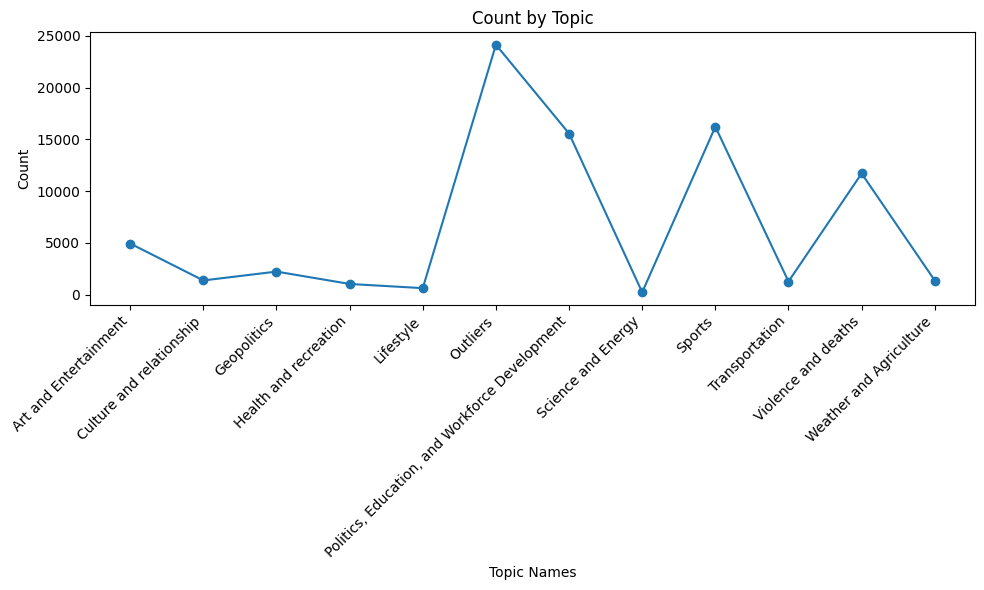

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Mapping from topic_new numbers to new topic names
topic_new_to_name = {
    1: "Sports",
    2: "Art and Entertainment",
    3: "Politics, Education, and Workforce Development",
    4: "Geopolitics",
    5: "Weather and Agriculture",
    6: "Transportation",
    7: "Violence and deaths",
    8: "Health and recreation",
    9: "Lifestyle",
    10: "Culture and relationship",
    11: "Science and Energy",
    12: "Outliers"
}


df_topics['new_topic_names'] = df_topics['topic_new'].map(topic_new_to_name)

topic_counts = df_topics.groupby('new_topic_names')['Count'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(topic_counts['new_topic_names'], topic_counts['Count'], marker='o')
plt.xticks(rotation=45, ha="right")
plt.ylabel('Count')
plt.xlabel('Topic Names')
plt.title('Count by Topic')
plt.tight_layout()
plt.show()


In [ ]:
output_csv_path = '/content/drive/MyDrive/bertopic/merged_topics.csv'
df_topics.to_csv(output_csv_path, index=False)

In [ ]:
df_1 = pd.read_csv('/content/drive/MyDrive/bertopic/merged_topics.csv')
df_1.head()

,Topic,Count,Name,Representation,Representative_Docs,topic_list,topic_new,representation_combo,new_topic_names
0,-1,24014,-1_police_people_chicago_year,"['police', 'people', 'chicago', 'year', 'years...",['year Chicago homicides late 1990s Amid spi...,"[-1, 32]",12,"['police', 'people', 'chicago', 'year', 'years...",Outliers
1,0,14714,0_game_field_season_team,"['game', 'field', 'season', 'team', 'games', '...",['Robert Quinn trade play Chicago Bears defen...,"[0, 7, 16, 33, 35]",1,"['game', 'field', 'season', 'team', 'games', '...",Sports
2,1,13125,1_school_district_chicago_year,"['school', 'district', 'chicago', 'year', 'per...",['PLAINFIELD SCHOOLS FAST TRACK Officials Pla...,"[4, 24, 1, 31]",3,"['school', 'district', 'chicago', 'year', 'per...","Politics, Education, and Workforce Development"
3,2,10490,2_funeral_late_am_loving,"['funeral', 'late', 'am', 'loving', 'beloved',...",['KEATING DOROTHY R Dorothy R Keating nee K...,"[11, 17, 18, 2, 30]",7,"['funeral', 'late', 'am', 'loving', 'beloved',...",Violence and deaths
4,3,4461,3_music_film_movie_theatre,"['music', 'film', 'movie', 'theatre', 'band', ...",['MUSICAL SINGS TABLOID TENDENCIES man stuck K...,"[3, 22, 23]",2,"['music', 'film', 'movie', 'theatre', 'band', ...",Art and Entertainment


In [ ]:
df_2 = pd.read_csv('/content/drive/MyDrive/bertopic/before_dataframe_with_topics.csv')
df_2['Publish Date'] = pd.to_datetime(df_2['Publish Date'], errors='coerce')
df_2['year'] = df_2['Publish Date'].dt.year
df_2.head()



,URL,Publish Date,combined_text,Topic_Number,Topic_Label,Representation_Words,year
0,https://www.chicagotribune.com/2002/01/31/abou...,2002-01-30 19:00:00,discovered missing Tuesday discovered missing ...,-1,police_people_chicago_year_years_city_time_sta...,"police, people, chicago, year, years, city, ti...",2002.0
1,https://www.chicagotribune.com/2017/03/31/grea...,2017-03-31 09:35:00,Great moments Chicago food history Jean Baptis...,1,school_district_chicago_year_percent_state_boa...,"school, district, chicago, year, percent, stat...",2017.0
2,https://www.chicagotribune.com/2000/05/31/two-...,2000-05-30 20:00:00,young Aurora men escaped injury Monday young A...,-1,police_people_chicago_year_years_city_time_sta...,"police, people, chicago, year, years, city, ti...",2000.0
3,https://www.chicagotribune.com/2006/02/28/atki...,2006-02-27 19:00:00,ATKINS BETH ANN Beth Ann Atkins nee Kanfer age...,2,funeral_late_am_loving_beloved_visitation_nee_...,"funeral, late, am, loving, beloved, visitation...",2006.0
4,https://www.chicagotribune.com/1999/06/30/koop...,1999-06-29 20:00:00,KOOP COUP SPINS WEB CULT PERSONALITY Everett K...,4,trump_president_obama_clinton_house_campaign_r...,"trump, president, obama, clinton, house, campa...",1999.0


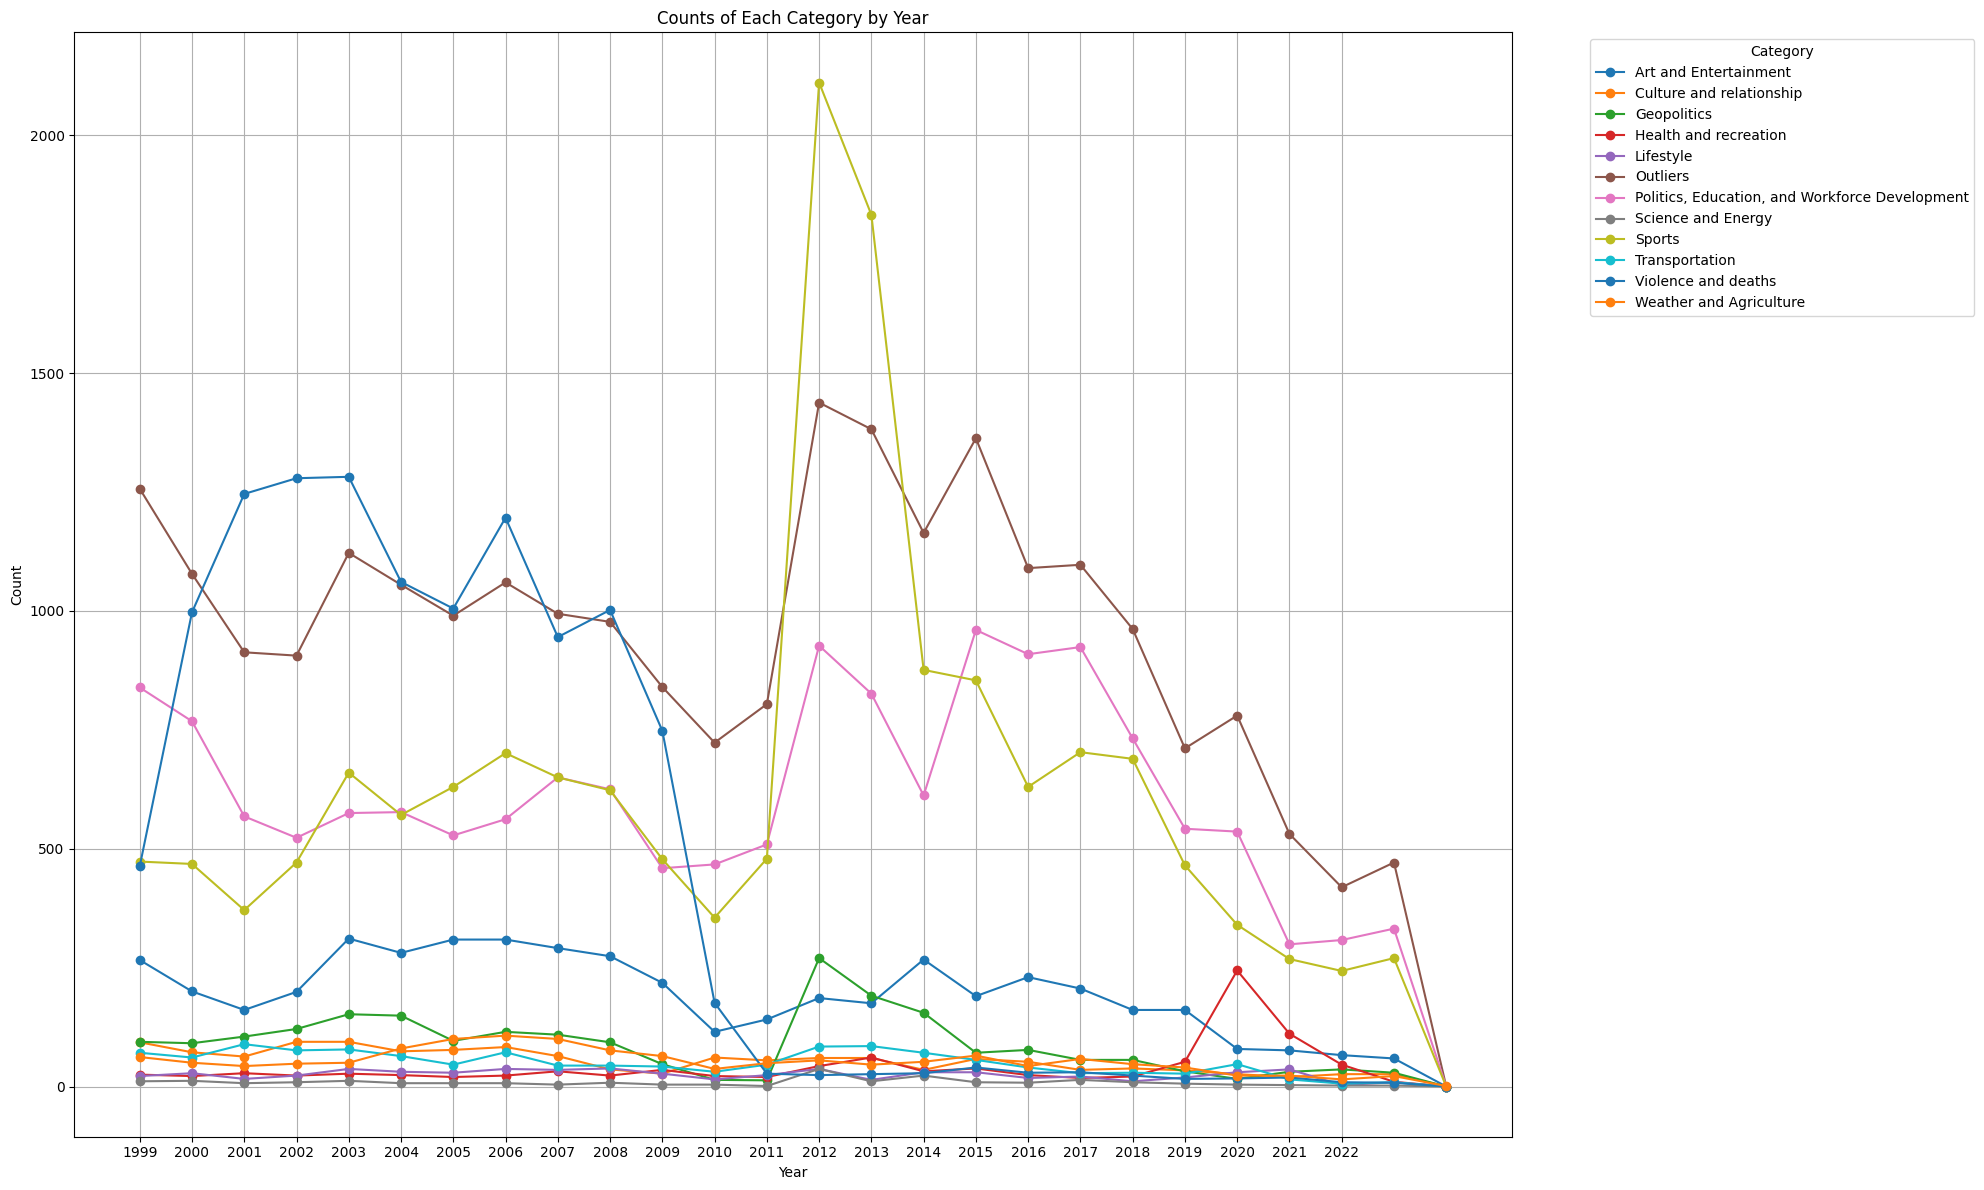

In [ ]:
import matplotlib.pyplot as plt


merged_df = pd.merge(df_2, df_1[['Topic', 'new_topic_names']], left_on='Topic_Number', right_on='Topic', how='inner')

category_counts_by_year = merged_df.groupby(['year', 'new_topic_names']).size().unstack(fill_value=0)

category_counts_by_year.reset_index(inplace=True)

plt.figure(figsize=(20, 12))

for category in category_counts_by_year.columns[1:]:
    plt.plot(category_counts_by_year['year'], category_counts_by_year[category], marker='o', label=category)

plt.title('Counts of Each Category by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.xticks(np.arange(1999,2023,1))
plt.show()


In [ ]:

unique_representation_combo = df_1['representation_combo'].unique()


unique_new_topic_names = df_1['new_topic_names'].unique()


print("Loading Words:")
print(unique_representation_combo)
print("\n Topics after merging:")
print(unique_new_topic_names)


Loading Words:
["['police', 'people', 'chicago', 'year', 'years', 'city', 'time', 'state', 'court', 'county', 'tribune regrets', 'regrets', 'corrections clarifications', 'clarifications', 'incorrectly', 'corrections', 'errors', 'regrets errors', 'tribune regrets errors', 'tribune']"
 "['game', 'field', 'season', 'team', 'games', 'points', 'bears', 'coach', 'cubs', 'sox', 'minute', 'half', 'ball', 'goal', 'gk', 'played', 'seniors', 'match', 'open', 'wimbledon', 'nadal', 'set', 'beat', 'roddick', 'round', 'federer', 'murray', 'rugby', 'australia', 'zealand', 'england', 'sri', 'lanka', 'sri lanka', 'test', 'cricket', 'photos', 'white sox', 'white', 'field white sox', 'field white', 'orioles']"
 "['school', 'district', 'chicago', 'year', 'percent', 'state', 'board', 'city', 'park', 'students', 'trump', 'president', 'obama', 'clinton', 'house', 'campaign', 'republican', 'bush', 'white house', 'presidential', 'abortion', 'marriage', 'court', 'abortions', 'samesex', 'law', 'gay', 'supreme', '

#Question-1

## Steps For Archives Data Collection (1900-1963) (Source: Chronicling America )

detailed explanation is in report.

**Step-1**

In [ ]:
import requests
import json
import time

def fetch_data_for_letter(letter, base_url):
    page = 1
    letter_data = {}

    while True:
        query_url = f"{base_url}&dates=1900/1999&dl=page&fa=location_country:united+states%7Clanguage:english&fp={letter.lower()}&sb=index&sp={page}"
        response = requests.get(query_url)

        if response.status_code == 200:
            data = response.json()
            filters_data = data.get('facets', [])[0].get('filters', []) if data.get('facets') else []

            if not filters_data:
                break  # Break the loop if there are no filters, indicating no more data for this letter and page

            # Store the data, only including 'on' and 'title' for each filter
            letter_data[str(page)] = [{'on': f['on'], 'title': f['title']} for f in filters_data]

            page += 1  # Move to the next page
        else:
            print(f"Failed to fetch data for letter {letter} page {page}")
            break

        time.sleep(1)  # Simple rate limiting to avoid hitting the API too rapidly

    return letter_data



base_url = "https://www.loc.gov/newspapers/index/partof_title/?fo=json"
reformatted_data = {}

    for letter in map(chr, range(65, 91)):  # ASCII values for A-Z
        print(f"Fetching data for letter {letter}")
        reformatted_data[letter] = fetch_data_for_letter(letter, base_url)


    with open('reformatted_newspaper_data_pages.json', 'w') as file:
        json.dump(reformatted_data, file, indent=4)

print("Data has been reformatted and saved successfully.")



**Step-2**

In [ ]:
# Load JSON data from the step-1 output
with open('reformatted_newspaper_data_pages.json') as file:
    data = json.load(file)

# Function to get the total results from the URL
def get_total_results_from_url(url):
    response = requests.get(url)
    if response.status_code == 200:
        response_json = response.json()
        total = response_json['pagination']['total']
        return total
    else:
        return None  # Return None if the request was unsuccessful

for letter, pages in data.items():
    print(f"Processing letter: {letter}")
    for page_number, entries in pages.items():
        for entry_index, entry in enumerate(entries):
            url = f"{entry['on']}&fo=json"
            try:
                total = get_total_results_from_url(url)
                if total is not None:
                    data[letter][page_number][entry_index]['total'] = total
                    print(f"Total pages for {letter} page {page_number} entry {entry_index} ({url}): {total}")
                else:
                    print(f"No total pages found for {letter} page {page_number} entry {entry_index} ({url})")
            except Exception as e:
                print(f"An error occurred while processing {url}: {e}")


with open('modified_reformatted_newspaper_data_with_totals.json', 'w') as file:
    json.dump(data, file, indent=4)

print("Modification complete and saved")



**Step-3**

In [ ]:


def get_endpoint_type(url):
    """Determine the endpoint type from the URL for rate limiting purposes."""
    if '/newspapers' in url:
        return 'newspapers'
    elif '/items' in url:
        return 'items'
    elif '/resources' in url:
        return 'resources'
    else:
        return 'other'

def rate_limited_get(url):

    try:
        response = requests.get(url)
        response.raise_for_status()
        return response
    except requests.RequestException as e:
        print(f"Request failed: {e}")
        return None

def get_results_from_pages(url, total, error_items):
    all_result_details = []
    endpoint_type = get_endpoint_type(url)

    # Adjust request_delay based on endpoint type according to given rate limits
    if endpoint_type == 'newspapers':
        request_delay = 60 / 20
    elif endpoint_type == 'items':
        request_delay = 10 / 10
    elif endpoint_type == 'resources':
        request_delay = 10 / 40
    else:
        request_delay = 60 / 80

    for page in range(1, total + 1):
        page_url = f"{url}&sp={page}"
        print(f"Fetching page: {page_url}")
        response = rate_limited_get(page_url)
        if response:
            response_json = response.json()
            results = response_json.get('results', [])
            for result in results:
                if 'url' in result and result['url'].endswith('?sp=1'):
                    result_details = {
                        'url': result['url'],
                        'language': result.get('language', 'N/A'),
                        'date': result.get('date', 'N/A'),
                        'publication_frequency': result.get('publication_frequency', 'N/A')
                    }
                    all_result_details.append(result_details)
        else:
            print(f"Skipping due to error, will retry later for URL: {page_url}")
            error_items.append((url, total))
        time.sleep(request_delay)
    return all_result_details

def process_data(data):
    error_items = []
    for section_key, section_value in data.items():
        if section_key == 'A':
            for list_key, item_list in section_value.items():
                if list_key == '1':
                    for index, item in enumerate(item_list):
                        if index == 0:
                            print(f"Processing section: {section_key}, list: {list_key}, item: {index}")
                            total = item['total']
                            item['result_details'] = get_results_from_pages(item['on'], total, error_items)
                            print("Stopping after A[1][0]")
                            return error_items  # Stop after processing A[1][0]




with open('modified_reformatted_newspaper_data_with_totals.json.json', 'r') as file:
    data = json.load(file)

error_items = process_data(data)


with open('enriched_data.json', 'w') as file:
    json.dump(data, file, indent=4)

print("Data processing complete and saved to enriched_data.json.")
if error_items:
    print("Items that encountered errors for potential retry:", error_items)



**Step-4**

In [ ]:
import requests
import json

def get_total_results_from_url(url_with_fo):
    response = requests.get(url_with_fo)
    if response.status_code == 200:
        response_json = response.json()
        total = response_json['pagination']['total']
        return total
    else:
        return None

with open('enriched_data.json') as file:
    data = json.load(file)

def update_data_with_totals(data):
    for section, section_data in data.items():  # e.g., 'A'
        for list_key, item_list in section_data.items():  # e.g., '1'
            print(f"Processing section: {section}, list: {list_key}")
            for item in item_list:
                if 'result_details' in item:  # Ensure 'result_details' exists
                    for detail_index, result_detail in enumerate(item['result_details']):
                        detailed_url = f"{result_detail['url']}&fo=json"  # Append &fo=json to URL
                        total = get_total_results_from_url(detailed_url)
                        if total is not None:
                            # Add the 'total' to the specific result_detail entry
                            item['result_details'][detail_index]['total'] = total
                            print(f"Updated {section}[{list_key}] result_detail[{detail_index}] with total: {total}")
                        else:
                            print(f"Failed to fetch total for {section}[{list_key}] result_detail[{detail_index}]")


update_data_with_totals(data)


output_filename = 'enriched_newspapers_with_totals.json'
with open(output_filename, 'w') as file:
    json.dump(data, file, indent=4)

print(f"Modification complete and saved to {output_filename}.")



**Step-5**

In [ ]:
import requests
import json

def fetch_full_text(url, total):
    """Fetches full text for all pages up to the total count."""
    full_texts = []
    for page in range(1, total + 1):
        detailed_url = f"{url}&sp={page}&fo=json"
        try:
            response = requests.get(detailed_url)
            response.raise_for_status()  # Check for HTTP request errors
            page_data = response.json()
            if 'full_text' in page_data:
                full_texts.append(page_data['full_text'])
        except requests.RequestException as e:
            print(f"Error fetching data for URL {detailed_url}: {e}")
            return None
    return full_texts


with open('enriched_totals.json') as file:
    data = json.load(file)

stop_after = ('A', '1', 0, 442)  # Define stopping point as (letter, numeric_key, entry_index, detail_index)
update_completed = False

for letter, letter_entries in data.items():
    if update_completed:
        break
    print(f"Processing letter: {letter}")
    for numeric_key, entries in letter_entries.items():
        if update_completed:
            break
        print(f"Processing numeric key: {numeric_key}")
        for entry_index, entry in enumerate(entries):
            if update_completed:
                break
            print(f"Processing entry: {entry_index}")
            if 'result_details' in entry:
                for detail_index, result_detail in enumerate(entry['result_details']):
                    if 'total' in result_detail and result_detail['total'] > 0:
                        url = result_detail['url']
                        total = result_detail['total']
                        full_texts = fetch_full_text(url, total)
                        if full_texts is not None:
                            data[letter][numeric_key][entry_index]['result_details'][detail_index]['full_texts'] = full_texts
                            print(f"Updated {letter}[{numeric_key}][{entry_index}] result_detail[{detail_index}] with full text.")
                        else:
                            print(f"Failed to update {letter}[{numeric_key}][{entry_index}] result_detail[{detail_index}] due to error.")
                    if (letter, numeric_key, entry_index, detail_index) == stop_after:
                        update_completed = True
                        break

# Specify the output filename
output_filename = 'enriched_with_full_texts.json' #only for [A][1][0]
with open(output_filename, 'w') as file:
    json.dump(data, file, indent=4)

print(f"Modification complete and saved to {output_filename}.")



# Check for completeness

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor


def process_row(row):
    if row['Language'] == 'English':
        try:

            response = requests.get(row['Link_to_Digital_Content'])
            soup = BeautifulSoup(response.content, 'html.parser')


            year_options = soup.find('select', {'id': 'id_year'}).find_all('option')

            # Extract years >= 1900
            years = [option.get('value') for option in year_options if int(option.get('value')) >= 1900]
            return years
        except Exception as e:
            print(f"Error processing row: {e}")
            return []
    else:
        return []

df = pd.read_csv('/content/drive/MyDrive/archives_data/chronicling_america_newspaper_location.csv')

# Use ThreadPoolExecutor to process rows in parallel
with ThreadPoolExecutor(max_workers=10) as executor:

    years_data = list(tqdm(executor.map(process_row, df.to_dict('records')), total=df.shape[0], desc="Processing rows"))

df['years'] = years_data


df.to_csv('/content/drive/MyDrive/archives_data/updated_chronicling_america_newspaper_location.csv', index=False)


In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor, as_completed

# Function to fetch and parse a single year's data and extract formatted dates
def fetch_year_data(year_url):
    try:
        # Fetch the HTML content for the year
        response = requests.get(year_url)
        soup = BeautifulSoup(response.content, 'html.parser')

        # Extract available date links from the calendar
        date_links = soup.find_all('div', class_='calendar_wrapper')
        formatted_dates = []
        for link in date_links:
            a_tags = link.find_all('a')
            for a in a_tags:
                date_url = a['href']
                # Extract the date from the URL and format it
                #  URL format: '/lccn/sn86072192/1900-01-01/ed-1/'
                date_parts = date_url.split('/')
                if len(date_parts) >= 4:
                    # Format the date as 'YYYY-MM-DD'
                    formatted_date = date_parts[3]
                    formatted_dates.append(formatted_date)
        return formatted_dates
    except Exception as e:
        print(f"Error processing {year_url}: {e}")
        return []


df = pd.read_csv('/content/drive/MyDrive/archives_data/updated_chronicling_america_newspaper_location.csv')

dates_data = [None] * len(df)

# Setup ThreadPoolExecutor
with ThreadPoolExecutor(max_workers=10) as executor:
    # Process each row in the DataFrame
    future_to_index = {}
    for index, row in df.iterrows():
        years = eval(row.get('years', '[]'))
        if years:  # Check if the years list is not empty
            for year in years:
                year_url = f"{row['Link_to_Digital_Content']}/{year}"
                future = executor.submit(fetch_year_data, year_url)
                future_to_index[future] = index

    # Use as_completed to process futures as they complete
    for future in tqdm(as_completed(future_to_index), total=len(future_to_index), desc="Fetching data"):
        index = future_to_index[future]
        all_formatted_dates = future.result()
        if dates_data[index] is None:
            dates_data[index] = all_formatted_dates
        else:
            dates_data[index].extend(all_formatted_dates)


dates_data = [dates if dates is not None else [] for dates in dates_data]


df['dates'] = dates_data

df.to_csv('/content/drive/MyDrive/archives_data/final_chronicling_america_newspaper_location.csv', index=False)


In [ ]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('/content/drive/MyDrive/archives_data/final_chronicling_america_newspaper_location.csv')


all_dates_set = set()
for dates_list in df['dates']:
    if pd.notna(dates_list):

        try:
            dates = eval(dates_list)
            all_dates_set.update(dates)
        except:
            continue


start_date = datetime.date(1900, 1, 1)
end_date = datetime.date(1963, 12, 31)


covered_days = 0
uncovered_days = 0

dates_coverage = []


current_date = start_date
while current_date <= end_date:
    if current_date.strftime('%Y-%m-%d') in all_dates_set:
        covered_days += 1
        dates_coverage.append(1)  # Mark as covered
    else:
        uncovered_days += 1
        dates_coverage.append(0)  # Mark as uncovered
    current_date += datetime.timedelta(days=1)



print(f"Total days covered: {covered_days}")
print(f"Total days not covered: {uncovered_days}")
print(f"Out of total {covered_days + uncovered_days} days from 1900-1963.")


# Most recent 25years data

# 50 MB Data Submission

# **Step-1**

**Extracting links from first 2days and last 2 days of each year(1999-2023)**

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime

def scrape_links_for_year_edges(start_year, end_year, url_template):
    all_links = []

    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3',
        'Referer': 'https://www.google.com/',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8'
    }

    for year in range(start_year, end_year + 1):
        # Handle both January and December
        for month, days in [(1, range(1, 3)), (12, range(30, 32))]:  # First 2 days of Jan and last 2 days of Dec
            for day in days:
                url = url_template.format(date=f"{year}/{str(month).zfill(2)}/{str(day).zfill(2)}")
                print(f"Processing: {year}/{str(month).zfill(2)}/{str(day).zfill(2)}")  # Print the date being processed

                try:
                    response = requests.get(url, headers=headers)
                    if response.status_code == 200:
                        soup = BeautifulSoup(response.content, 'html.parser')
                        links = set(a['href'] for a in soup.find_all('a', href=True))

                        # Filter links for the specific date
                        filtered_links = {
                            link for link in links
                            if link.startswith(f"https://www.chicagotribune.com/{year}/{str(month).zfill(2)}/{str(day).zfill(2)}")
                        }

                        all_links.extend(filtered_links)
                except Exception as e:
                    print(f"Failed to process {year}/{str(month).zfill(2)}/{str(day).zfill(2)}: {e}")

    return list(set(all_links))

# URL template
url_template = 'https://www.chicagotribune.com/sitemap/{date}/'

# start and end years
start_year = 1999
end_year = 2023


links = scrape_links_for_year_edges(start_year, end_year, url_template)


df = pd.DataFrame(links, columns=['Urls'])
csv_filename = 'ct_links_year_2days_edges_1999_2023.csv'
df.to_csv(csv_filename, index=False)

print(f"Links for the first 2 and last 2 days of the year from 1999 to 2023 have been saved to {csv_filename}. Total links: {len(links)}")





**This is used for extracting data for topic modeling where links from last of each month 12 days a year for all 25years(1999-2023)**

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def last_day_of_month(year, month):
    """
    Returns the last day of the month accounting for leap years.
    """
    if month == 2:  # February
        if year % 4 == 0 and (year % 100 != 0 or year % 400 == 0):
            return 29
        else:
            return 28
    elif month in [4, 6, 9, 11]:  # April, June, September, November
        return 30
    else:  # January, March, May, July, August, October, December
        return 31

def scrape_links_for_last_days(start_year, end_year, url_template):
    all_links = []

    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3',
        'Referer': 'https://www.google.com/',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8'
    }

    for year in range(start_year, end_year + 1):
        for month in range(1, 13):
            day = last_day_of_month(year, month)
            # Simplify the print statement to just the date
            print(f"Processing: {year}/{str(month).zfill(2)}/{str(day).zfill(2)}")

            url = url_template.format(date=f"{year}/{str(month).zfill(2)}/{str(day).zfill(2)}")

            try:
                response = requests.get(url, headers=headers)
                if response.status_code == 200:
                    soup = BeautifulSoup(response.content, 'html.parser')
                    links = set(a['href'] for a in soup.find_all('a', href=True))
                    filtered_links = {
                        link for link in links
                        if link.startswith(f"https://www.chicagotribune.com/{year}/{str(month).zfill(2)}/{str(day).zfill(2)}")
                    }

                    all_links.extend(filtered_links)
            except Exception as e:
                print(f"Failed to process {year}/{str(month).zfill(2)}/{str(day).zfill(2)}: {e}")

    return list(set(all_links))

# Define the URL template and adjust the end year
url_template = 'https://www.chicagotribune.com/sitemap/{date}/'
start_year = 1999
end_year = 2023  # Assuming the print was a mistake, adjusting to match the print statement

# Execute the scraping
links = scrape_links_for_last_days(start_year, end_year, url_template)

# Save the links to a CSV file
df = pd.DataFrame(links, columns=['Urls'])
csv_filename = 'data/ct/ct_links_last_day_1999_2023.csv'
df.to_csv(csv_filename, index=False)

print(f"Completed. Total links: {len(links)}")




# **Step-2**

**Scraping the article text, title and date for each link**

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import os
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm

def fetch_article_content(url):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
    try:
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            return {"success": True, "content": response.text}
        else:
            return {"success": False, "error": f"HTTP status code {response.status_code}"}
    except Exception as e:
        return {"success": False, "error": str(e)}

def extract_article_details(url):
    response = fetch_article_content(url)
    if not response["success"]:
        return {"URL": url, "Title": "Failed to fetch", "Publish Date": "Failed to fetch", "Text": "Failed to fetch"}

    html_content = response["content"]
    soup = BeautifulSoup(html_content, 'html.parser')

    title_tag = soup.find('title')
    title = title_tag.text if title_tag else "No Title Found"

    published_date_tag = soup.find('time')
    published_date = published_date_tag['datetime'] if published_date_tag and 'datetime' in published_date_tag.attrs else "No Publish Date Found"

    paragraphs = soup.find_all('p')
    article_text = '\n'.join([p.get_text() for p in paragraphs])

    return {
        "URL": url,
        "Title": title,
        "Publish Date": published_date,
        "Text": article_text
    }

def update_output_file(df, filename):
    if not os.path.exists(filename):
        df.to_csv(filename, index=False)
    else:
        df.to_csv(filename, mode='a', header=False, index=False)

def process_urls(url):
    return extract_article_details(url)

# Input handling
source_file = 'any source file'
output_file = ''

if os.path.exists(output_file):
    output_df = pd.read_csv(output_file)
    processed_urls = output_df['URL'].tolist()
    print(f"Resuming from link {len(processed_urls) + 1}.")
else:
    output_df = pd.DataFrame(columns=['URL', 'Title', 'Publish Date', 'Text'])
    processed_urls = []
    print("Starting from the beginning.")

df = pd.read_csv(source_file)
df_filtered = df[~df['Urls'].isin(processed_urls)]

batch_data = []  # Store temporary data here

with ThreadPoolExecutor(max_workers=10) as executor:
    futures = [executor.submit(process_urls, url) for url in df_filtered['Urls']]
    for future in tqdm(as_completed(futures), total=len(futures), desc="Processing URLs"):
        article_details = future.result()
        batch_data.append(article_details)
        if len(batch_data) % 10 == 0:
            temp_output_df = pd.DataFrame(batch_data)
            update_output_file(temp_output_df, output_file)
            batch_data.clear()

# Save any remaining articles not yet saved
if batch_data:
    temp_output_df = pd.DataFrame(batch_data)
    update_output_file(temp_output_df, output_file)

print(f"Data enrichment complete. Final data saved to {output_file}.")